In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
class beta:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def draw(self, size=1):
        return stat.beta.rvs(self.a, self.b, size=size)
    
    def plot(self):
        x = np.linspace(0,1,1000)
        y = stat.beta.pdf(x, self.a, self.b)
        plt.plot(x, y)

In [3]:
class gem: 
    def __init__(self, a):
        self.beta = beta(1, a)
        
    def generate(self, k):
        rhos = []
        prev = 1
        for x in range(k):
            draw = self.beta.draw()[0]
            normalized = draw*prev
            rhos.append(normalized)
            prev *= 1 - draw
        return rhos

In [31]:
g = gem(1)
output = g.generate(100)
np.sum(output)

1.0

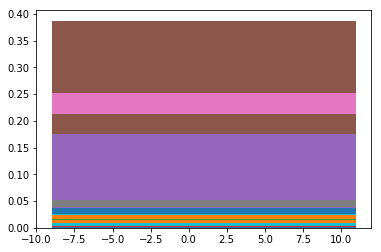

In [36]:
last = None
width = 20

for o in output:
    if last is None:
        plt.bar(1, (o), width)
    else:
        plt.bar(1, (o), width, bottom=last)
        
    last = (o)
    
plt.show()